# Trabajo practico Nº2
### Mineria de datos - TUIA
### 08/11/2024
#### Integrantes:
Bravi Eugenio B-6600/1

Nemeth Ulises N-1249/1

# Librerias

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Carga de datos

In [72]:
df_companies = pd.read_csv('./1000_Companies.csv')
df_companies.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
df_pokemon = pd.read_csv('./PokemonDBCart.csv')
df_pokemon.head()

,Nombre,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon
0,Bulbasaur,49,49,45,45,65,65,hierba
1,Ivysaur,62,63,60,60,80,80,hierba
2,Venusaur,100,123,80,80,122,120,hierba
3,Charmander,52,43,65,39,60,50,fuego
4,Charmeleon,64,58,80,58,80,65,fuego


# 1. Analisis de datos

In [74]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [75]:
df_companies.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [76]:
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(df_companies.drop('Profit', axis=1), df_companies['Profit'], test_size=0.2, random_state=42)

In [77]:
X_train_comp.describe()

,RyD_Spend,Administration,MarketingSpend
count,800.000000,800.000000,800.000000
mean,81975.291150,122887.896835,226969.821069
std,46707.482003,11574.679339,92039.930034
min,0.000000,51283.140000,0.000000
25%,43084.500000,116654.899500,150969.584600
50%,81054.500000,122746.690400,228190.695800
75%,123806.750000,129060.069850,307664.501425
max,165349.200000,270939.860000,471784.100000


array([[<Axes: title={'center': 'RyD_Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'MarketingSpend'}>, <Axes: >]],
      dtype=object)

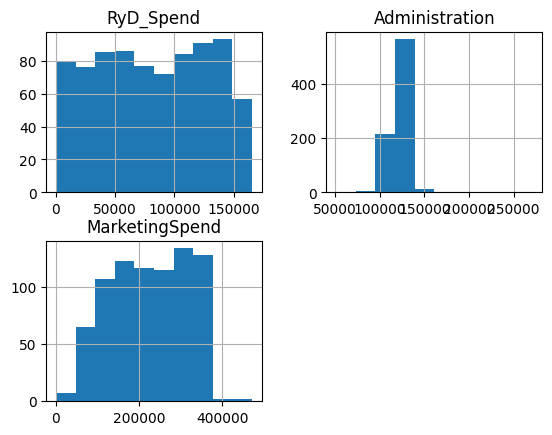

In [78]:
X_train_comp.hist()

Se observa que el dataset presenta distintas escalas por lo que sera necesario aplicarle un escalado a los datos para evitar problemas en la creacion del arbol de decisiones.

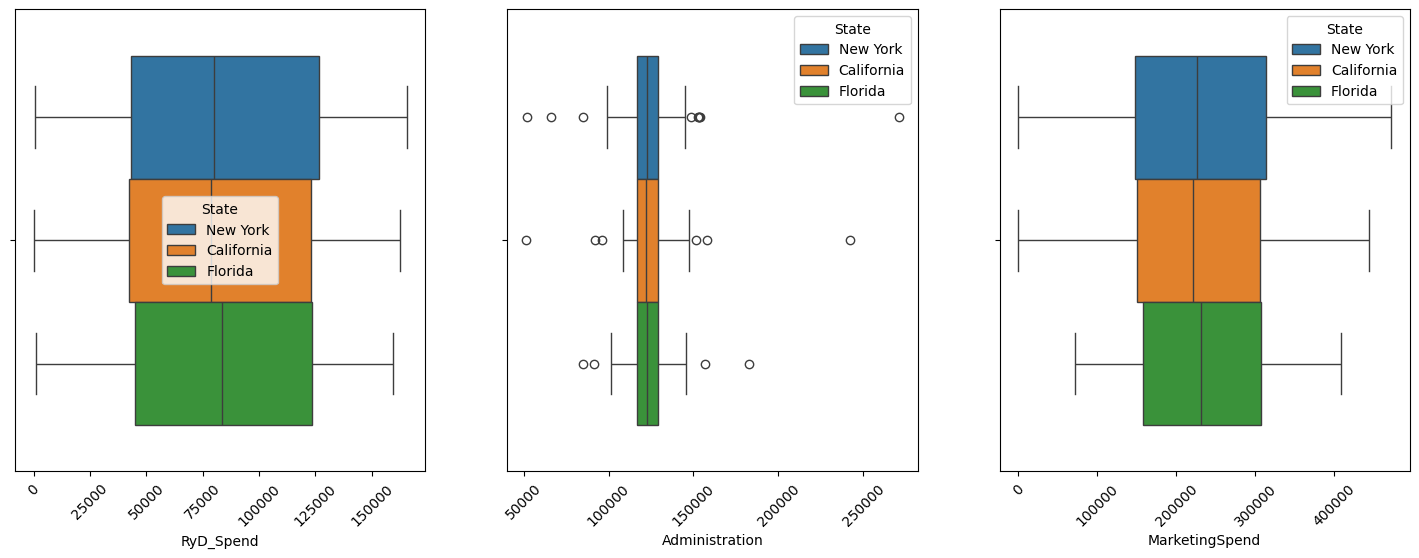

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='RyD_Spend', data=X_train_comp, orient='h', ax=axes[0], hue='State')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Administration', data=X_train_comp, orient='h', ax=axes[1], hue='State')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='MarketingSpend', data=X_train_comp, orient='h', ax=axes[2], hue='State')
axes[2].tick_params(axis='x', rotation=45)

plt.show()

In [80]:
# Analisis de balanceo de datos
state_counts = X_train_comp['State'].value_counts()

# Obtener el valor máximo y mínimo
max_value = state_counts.max()
min_value = state_counts.min()

percentage_difference = ((max_value - min_value) / max_value) * 100

# Mostrar el resultado
print(f'{state_counts}\nLa diferencia porcentual entre el valor máximo y mínimo es: {percentage_difference:.2f}%')

State
New York      279
California    267
Florida       254
Name: count, dtype: int64
La diferencia porcentual entre el valor máximo y mínimo es: 8.96%


Se observa que los datos estan razonablemente balanceados ya que hay una diferencia menor al 10% en la cantidad de datos en cada clase.
Tambien se observa que que la variable 'Administration' cuenta con valores atipicos por lo que se tendra que utilizar RobustScaler como el scaler a utilizar.

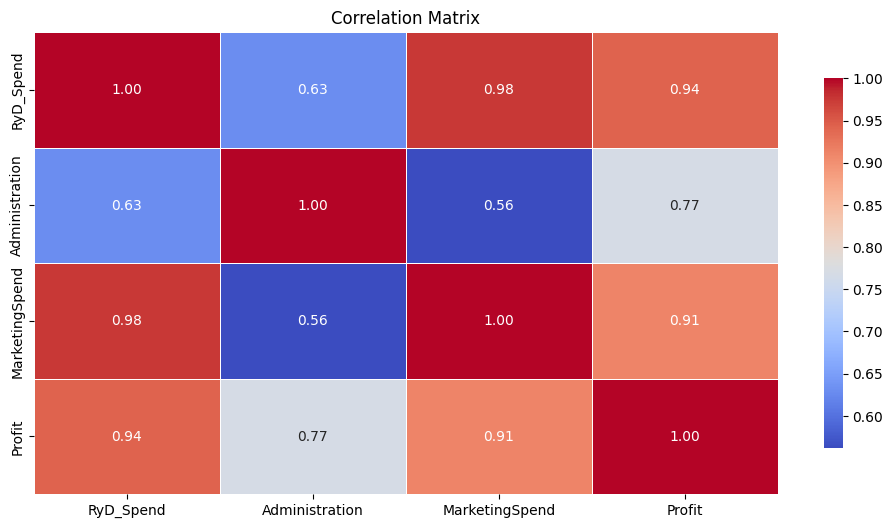

In [81]:
df_train_comp = pd.concat([X_train_comp, y_train_comp], axis=1)
correlation_matrix = df_train_comp[['RyD_Spend','Administration','MarketingSpend','Profit']].corr()
# Crear el heatmap con seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix,  annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.show()

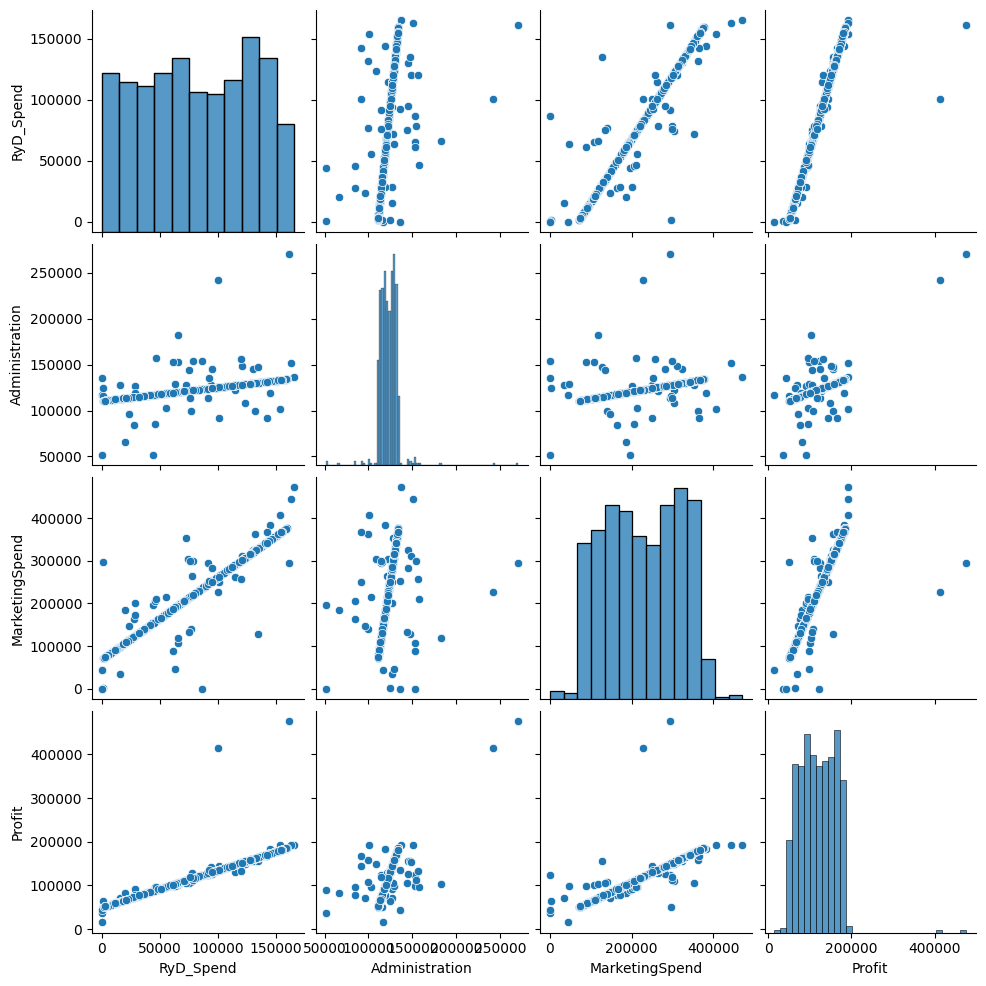

In [82]:
#Pairplot
for i in range(0, len(df_train_comp[['RyD_Spend','Administration','MarketingSpend','Profit']].columns), 5):
    sns.pairplot(data=df_train_comp[['RyD_Spend','Administration','MarketingSpend','Profit']],
                x_vars=df_train_comp[['RyD_Spend','Administration','MarketingSpend','Profit']].columns[i:i+5],
                y_vars=['RyD_Spend','Administration','MarketingSpend','Profit'],
)  
    plt.show()

Se observa que hay fuertes correlaciones entre las variables sobre todo entre las variables 'RyD_Spend','MarketingSpend','Profit' que tienen una correlación en el rango de (0.91-0.98) siendo una correlacion casi lineal. 

In [83]:
X_train_comp = pd.get_dummies(X_train_comp, columns=['State'], drop_first=True)
X_test_comp = pd.get_dummies(X_test_comp, columns=['State'], drop_first=True)
X_train_comp.head()

,RyD_Spend,Administration,MarketingSpend,State_Florida,State_New York
29,65605.48,153032.0600,107138.38000,False,True
535,12068.00,112239.3528,92064.27813,False,False
695,133587.00,130185.8323,326535.52050,False,False
557,83794.00,122832.1752,230459.79100,False,False
836,141217.00,131312.6654,341257.62630,False,True


In [84]:
robust_scaler = RobustScaler().set_output(transform='pandas')
X_train_comp_esc = robust_scaler.fit_transform(X_train_comp)
X_test_comp_esc = robust_scaler.transform(X_test_comp)

# 2. Árboles de decisión (Regresión)